# 第十一章 Numpy库

## 11.1 为什么要用Numpy

### 11.1.1 &ensp;低效的Python for循环

【例】 求100万个数的倒数

In [9]:
def compute_reciprocals(values):
    res = []
    for value in values:      # 每遍历到一个元素，就要判断其类型，并查找适用于该数据类型的正确函数
        res.append(1/value)
    return res


values = list(range(1, 1000000))
%timeit compute_reciprocals(values)

145 ms ± 13.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


%timeit ：ipython中统计运行时间的魔术方法（多次运行取平均值）

In [10]:
import numpy as np

values = np.arange(1, 1000000)
%timeit 1/values

5.99 ms ± 33.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


**实现相同计算，Numpy的运行速度是Python循环的25倍，产生了质的飞跃**

### 11.1.2 &ensp;Numpy为什么如此高效

**Numpy 是由C语言编写的**

**1、编译型语言VS解释型语言**

C语言执行时，对代码进行整体编译，速度更快

**2、连续单一类型存储VS分散多变类型存储**

（1）Numpy数组内的数据类型必须是统一的，如全部是浮点型，而Python列表支持任意类型数据的填充
  
（2）Numpy数组内的数据**连续存储在内存中**，而Python列表的数据**分散在内存中**
  
 &emsp; **这种存储结构，与一些更加高效的底层处理方式更加的契合**

**3、多线程VS线程锁**

Python语言执行时有线程锁，无法实现真正的多线程并行，而C语言可以

### 11.1.3 &ensp;什么时候用Numpy

**在数据处理的过程中，遇到使用“Python for循环” 实现一些向量化、矩阵化操作的时候，要优先考虑用Numpy**

如：  1、两个向量的点乘  
  
&emsp;  &emsp;2、矩阵乘法  

## 11.2 Numpy数组的创建

### 11.2.1 从列表开始创建

In [11]:
import numpy as np

x = np.array([1, 2, 3, 4, 5])
print(x)

[1 2 3 4 5]


In [12]:
print(type(x))
print(x.shape)

<class 'numpy.ndarray'>
(5,)


* 设置数组的数据类型

In [13]:
x = np.array([1, 2, 3, 4, 5], dtype="float32")
print(x)
print(type(x[0]))

[1. 2. 3. 4. 5.]
<class 'numpy.float32'>


* 二维数组

In [15]:
x = np.array([[1, 2, 3],
             [4, 5, 6],
             [7, 8, 9]])
print(x)
print(x.shape)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
(3, 3)


### 11.2.2 从头创建数组

**（1）创建长度为5的数组，值都为0**

In [16]:
np.zeros(5, dtype=int)

array([0, 0, 0, 0, 0])

**（2）创建一个2*4的浮点型数组，值都为1**

In [17]:
np.ones((2, 4), dtype=float)

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.]])

**（3）创建一个3*5的数组，值都为8.8**

In [18]:
np.full((3, 5), 8.8)

array([[8.8, 8.8, 8.8, 8.8, 8.8],
       [8.8, 8.8, 8.8, 8.8, 8.8],
       [8.8, 8.8, 8.8, 8.8, 8.8]])

**（4）创建一个3*3的单位矩阵**

In [19]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

**（5）创建一个线性序列数组，从1开始，到15结束，步长为2**

In [20]:
np.arange(1, 15, 2)

array([ 1,  3,  5,  7,  9, 11, 13])

**（6）创建一个4个元素的数组，这四个数均匀的分配到0~1**

In [21]:
np.linspace(0, 1, 4)

array([0.        , 0.33333333, 0.66666667, 1.        ])

**（7）创建一个10个元素的数组，形成1~10^9的等比数列**

In [22]:
np.logspace(0, 9, 10)

array([1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07,
       1.e+08, 1.e+09])

**（8）创建一个3*3的，在0~1之间均匀分布的随机数构成的数组**

In [23]:
np.random.random((3,3))

array([[0.24347952, 0.41715541, 0.41363866],
       [0.44869706, 0.18128167, 0.18568051],
       [0.05705023, 0.0689205 , 0.74837661]])

**（9）创建一个3*3的，均值为0，标准差为1的正态分布随机数构成的数组**

In [24]:
np.random.normal(0, 1, (3,3))

array([[-0.38530465,  0.17474932,  0.31129291],
       [ 1.61626424, -2.18883854,  0.54043825],
       [-0.9141666 , -0.03804043, -0.6645122 ]])

**（10）创建一个3*3的，在[0,10)之间随机整数构成的数组**

In [25]:
np.random.randint(0, 10, (3,3))

array([[9, 1, 9],
       [0, 3, 9],
       [8, 5, 4]])

**（11）随机重排列**

In [26]:
x = np.array([10, 20, 30, 40])
np.random.permutation(x)       # 生产新列表

array([20, 40, 10, 30])

In [27]:
print(x)
np.random.shuffle(x)          # 修改原列表
print(x)

[10 20 30 40]
[20 40 10 30]


**（12）随机采样**

* 按指定形状采样

In [28]:
x = np.arange(10, 25, dtype = float)
x

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
       23., 24.])

In [29]:
np.random.choice(x, size=(4, 3))

array([[19., 23., 22.],
       [22., 21., 13.],
       [15., 21., 17.],
       [14., 23., 19.]])

In [4]:
import numpy as np
np.random.choice(10, 10)

array([0, 0, 9, 5, 8, 5, 2, 4, 9, 8])

In [9]:
x = np.arange(5).reshape(1, 5)
x
x.sum(axis=1, keepdims=True)

array([[10]])

* 按概率采样

In [30]:
np.random.choice(x, size=(4, 3), p=x/np.sum(x))

array([[15., 21., 20.],
       [23., 17., 18.],
       [23., 15., 17.],
       [19., 24., 22.]])

## 11.3 Numpy数组的性质

### 11.3.1 数组的属性

In [31]:
x = np.random.randint(10, size=(3, 4))
x

array([[5, 5, 2, 7],
       [2, 3, 0, 8],
       [3, 8, 1, 7]])

**1、数组的形状shape**

In [32]:
x.shape

(3, 4)

**2、数组的维度ndim**

In [33]:
x.ndim

2

In [34]:
y = np.arange(10)
y

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [35]:
y.ndim

1

**3、数组的大小size**

In [36]:
x.size

12

**4、数组的数据类型dtype**

In [37]:
x.dtype

dtype('int32')

### 11.3.2 数组索引

**1、一维数组的索引**

In [38]:
x1 = np.arange(10)
x1

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [39]:
x1[0]

0

In [40]:
x1[5]

5

In [41]:
x1[-1]

9

**2、多维数组的索引——以二维为例**

In [42]:
x2 = np.random.randint(0, 20, (2,3))
x2

array([[11,  3, 11],
       [ 6,  1,  5]])

In [43]:
x2[0, 0]

11

In [44]:
x2[0][0]

11

**注意：numpy数组的数据类型是固定的，向一个整型数组插入一个浮点值，浮点值会向下进行取整**

In [46]:
x2[0, 0] = 1.618

In [47]:
x2

array([[ 1,  3, 11],
       [ 6,  1,  5]])

### 11.3.3 数组的切片

**1、一维数组——跟列表一样**

In [48]:
x1 = np.arange(10)
x1

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [49]:
x1[:3]

array([0, 1, 2])

In [50]:
x1[3:]

array([3, 4, 5, 6, 7, 8, 9])

In [51]:
x1[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

**2、多维数组——以二维为例**

In [52]:
x2 = np.random.randint(20, size=(3,4)) 
x2

array([[14,  9, 15,  8],
       [18,  8, 16, 17],
       [ 0,  8,  2, 17]])

In [53]:
x2[:2, :3]             # 前两行，前三列

array([[14,  9, 15],
       [18,  8, 16]])

In [54]:
x2[:2, 0:3:2]       # 前两行 前三列（每隔一列）

array([[14, 15],
       [18, 16]])

In [55]:
x2[::-1, ::-1]

array([[17,  2,  8,  0],
       [17, 16,  8, 18],
       [ 8, 15,  9, 14]])

**3、获取数组的行和列**

In [56]:
x3 = np.random.randint(20, size=(3,4)) 
x3

array([[ 8, 13, 15,  7],
       [19, 13, 17,  6],
       [11,  2,  0, 12]])

In [57]:
x3[1, :]   #第一行  从0开始计数

array([19, 13, 17,  6])

In [58]:
x3[1]    # 第一行简写

array([19, 13, 17,  6])

In [59]:
x3[:, 2]  # 第二列   从0开始计数

array([15, 17,  0])

**4、切片获取的是视图，而非副本**

In [60]:
x4 = np.random.randint(20, size=(3,4)) 
x4

array([[ 5, 14,  7,  2],
       [ 8, 12,  9,  3],
       [19,  0, 10,  7]])

In [61]:
x5 = x4[:2, :2]
x5

array([[ 5, 14],
       [ 8, 12]])

**注意：视图元素发生修改，则原数组亦发生相应修改**

In [62]:
x5[0, 0] = 0
x5

array([[ 0, 14],
       [ 8, 12]])

In [63]:
x4

array([[ 0, 14,  7,  2],
       [ 8, 12,  9,  3],
       [19,  0, 10,  7]])

**修改切片的安全方式：copy**

In [64]:
x4 = np.random.randint(20, size=(3,4)) 
x4

array([[18, 14, 10, 12],
       [10, 16,  7, 19],
       [ 3, 16,  3, 12]])

In [65]:
x6 = x4[:2, :2].copy()
x6

array([[18, 14],
       [10, 16]])

In [66]:
x6[0, 0] = 0
x6

array([[ 0, 14],
       [10, 16]])

In [67]:
x4

array([[18, 14, 10, 12],
       [10, 16,  7, 19],
       [ 3, 16,  3, 12]])

### 11.3.4 数组的变形

In [68]:
x5 = np.random.randint(0, 10, (12,))
x5

array([9, 8, 5, 9, 2, 6, 2, 9, 4, 5, 1, 7])

In [69]:
x5.shape

(12,)

In [70]:
x6 = x5.reshape(3, 4)
x6

array([[9, 8, 5, 9],
       [2, 6, 2, 9],
       [4, 5, 1, 7]])

**注意：reshape返回的是视图，而非副本**

In [71]:
x6[0, 0] = 0
x5

array([0, 8, 5, 9, 2, 6, 2, 9, 4, 5, 1, 7])

**一维向量转行向量**

In [72]:
x7 = x5.reshape(1, x5.shape[0])    
x7

array([[0, 8, 5, 9, 2, 6, 2, 9, 4, 5, 1, 7]])

In [73]:
x8 = x5[np.newaxis, :]
x8

array([[0, 8, 5, 9, 2, 6, 2, 9, 4, 5, 1, 7]])

**一维向量转列向量**

In [74]:
x7 = x5.reshape(x5.shape[0], 1)    
x7

array([[0],
       [8],
       [5],
       [9],
       [2],
       [6],
       [2],
       [9],
       [4],
       [5],
       [1],
       [7]])

In [75]:
x8 = x5[:, np.newaxis]
x8

array([[0],
       [8],
       [5],
       [9],
       [2],
       [6],
       [2],
       [9],
       [4],
       [5],
       [1],
       [7]])

**多维向量转一维向量**

In [76]:
x6 = np.random.randint(0, 10, (3, 4))
x6

array([[3, 7, 6, 4],
       [4, 5, 6, 3],
       [7, 6, 2, 3]])

**flatten返回的是副本**

In [77]:
x9 = x6.flatten()
x9

array([3, 7, 6, 4, 4, 5, 6, 3, 7, 6, 2, 3])

In [78]:
x9[0]=0
x6

array([[3, 7, 6, 4],
       [4, 5, 6, 3],
       [7, 6, 2, 3]])

**ravel返回的是视图**

In [79]:
x10 = x6.ravel()
x10

array([3, 7, 6, 4, 4, 5, 6, 3, 7, 6, 2, 3])

In [80]:
x10[0]=0
x6

array([[0, 7, 6, 4],
       [4, 5, 6, 3],
       [7, 6, 2, 3]])

**reshape返回的是视图**

In [81]:
x11 = x6.reshape(-1)
x11

array([0, 7, 6, 4, 4, 5, 6, 3, 7, 6, 2, 3])

In [82]:
x11[0]=10
x6

array([[10,  7,  6,  4],
       [ 4,  5,  6,  3],
       [ 7,  6,  2,  3]])

### 11.3.5 数组的拼接

In [84]:
x1 = np.array([[1, 2, 3],
              [4, 5, 6]])
x2 = np.array([[7, 8, 9],
              [0, 1, 2]])

**1、水平拼接——非视图**

In [85]:
x3 = np.hstack([x1, x2])
x3

array([[1, 2, 3, 7, 8, 9],
       [4, 5, 6, 0, 1, 2]])

In [86]:
x3[0][0] = 0
x1

array([[1, 2, 3],
       [4, 5, 6]])

In [87]:
x4 = np.c_[x1, x2]
x4

array([[1, 2, 3, 7, 8, 9],
       [4, 5, 6, 0, 1, 2]])

In [88]:
x4[0][0] = 0
x1

array([[1, 2, 3],
       [4, 5, 6]])

**2、垂直拼接——非视图**

In [216]:
x1 = np.array([[1, 2, 3],
              [4, 5, 6]])
x2 = np.array([[7, 8, 9],
              [0, 1, 2]])

In [89]:
x5 = np.vstack([x1, x2])
x5

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9],
       [0, 1, 2]])

In [90]:
x6 = np.r_[x1, x2]
x6

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9],
       [0, 1, 2]])

### 11.3.6 数组的分裂

**1、split的用法**

In [91]:
x6 = np.arange(10)
x6

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [92]:
x1, x2, x3 = np.split(x6, [2, 7])
print(x1, x2, x3)

[0 1] [2 3 4 5 6] [7 8 9]


**2、hsplit的用法**

In [97]:
x7 = np.arange(1, 26).reshape(5, 5)
x7

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25]])

In [99]:
left, middle, right = np.hsplit(x7, [2,4])
print("left:\n", left)            # 第0~1列
print("middle:\n", middle)        # 第2~3列
print("right:\n", right)          # 第4列

left:
 [[ 1  2]
 [ 6  7]
 [11 12]
 [16 17]
 [21 22]]
middle:
 [[ 3  4]
 [ 8  9]
 [13 14]
 [18 19]
 [23 24]]
right:
 [[ 5]
 [10]
 [15]
 [20]
 [25]]


**3、vsplit的用法**

In [100]:
x7 = np.arange(1, 26).reshape(5, 5)
x7

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25]])

In [101]:
upper, middle, lower = np.vsplit(x7, [2,4])
print("upper:\n", upper)         # 第0~1行
print("middle:\n", middle)       # 第2~3行
print("lower:\n", lower)         # 第4行

upper:
 [[ 1  2  3  4  5]
 [ 6  7  8  9 10]]
middle:
 [[11 12 13 14 15]
 [16 17 18 19 20]]
lower:
 [[21 22 23 24 25]]


## 11.4 Numpy四大运算

### 11.4.1 向量化运算

**1、与数字的加减乘除等**

In [102]:
x1 = np.arange(1,6)
x1

array([1, 2, 3, 4, 5])

In [103]:
print("x1+5", x1+5)
print("x1-5", x1-5)
print("x1*5", x1*5)
print("x1/5", x1/5)

x1+5 [ 6  7  8  9 10]
x1-5 [-4 -3 -2 -1  0]
x1*5 [ 5 10 15 20 25]
x1/5 [0.2 0.4 0.6 0.8 1. ]


In [104]:
print("-x1", -x1)
print("x1**2", x1**2)
print("x1//2", x1//2)
print("x1%2", x1%2)

-x1 [-1 -2 -3 -4 -5]
x1**2 [ 1  4  9 16 25]
x1//2 [0 1 1 2 2]
x1%2 [1 0 1 0 1]


**2、绝对值、三角函数、指数、对数**

（1）绝对值

In [105]:
x2 = np.array([1, -1, 2, -2, 0])
x2

array([ 1, -1,  2, -2,  0])

In [106]:
abs(x2)

array([1, 1, 2, 2, 0])

In [107]:
np.abs(x2)

array([1, 1, 2, 2, 0])

（2）三角函数

In [108]:
theta = np.linspace(0, np.pi, 3)
theta

array([0.        , 1.57079633, 3.14159265])

In [109]:
print("sin(theta)", np.sin(theta))
print("con(theta)", np.cos(theta))
print("tan(theta)", np.tan(theta))

sin(theta) [0.0000000e+00 1.0000000e+00 1.2246468e-16]
con(theta) [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(theta) [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


In [110]:
x = [1, 0 ,-1]
print("arcsin(x)", np.arcsin(x))
print("arccon(x)", np.arccos(x))
print("arctan(x)", np.arctan(x))

arcsin(x) [ 1.57079633  0.         -1.57079633]
arccon(x) [0.         1.57079633 3.14159265]
arctan(x) [ 0.78539816  0.         -0.78539816]


（3）指数运算

In [111]:
x = np.arange(3)
x

array([0, 1, 2])

In [112]:
np.exp(x)

array([1.        , 2.71828183, 7.3890561 ])

（4）对数运算

In [113]:
x = np.array([1, 2, 4, 8 ,10])
print("ln(x)", np.log(x))
print("log2(x)", np.log2(x))
print("log10(x)", np.log10(x))

ln(x) [0.         0.69314718 1.38629436 2.07944154 2.30258509]
log2(x) [0.         1.         2.         3.         3.32192809]
log10(x) [0.         0.30103    0.60205999 0.90308999 1.        ]


**3、两个数组的运算**

In [114]:
x1 = np.arange(1,6)
x1

array([1, 2, 3, 4, 5])

In [115]:
x2 = np.arange(6,11)
x2

array([ 6,  7,  8,  9, 10])

In [116]:
print("x1+x2:", x1+x2)
print("x1-x2:", x1-x2)
print("x1*x2:", x1*x2)
print("x1/x2:", x1/x2)

x1+x2: [ 7  9 11 13 15]
x1-x2: [-5 -5 -5 -5 -5]
x1*x2: [ 6 14 24 36 50]
x1/x2: [0.16666667 0.28571429 0.375      0.44444444 0.5       ]


### 11.4.2 矩阵运算

In [132]:
x = np.arange(9).reshape(3, 3)
x

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

* 矩阵的转置

In [138]:
y = x.T
y

array([[0, 3, 6],
       [1, 4, 7],
       [2, 5, 8]])

* 矩阵乘法

In [139]:
x = np.array([[1, 0],
             [1, 1]])
y = np.array([[0, 1],
             [1, 1]])

In [140]:
x.dot(y)

array([[0, 1],
       [1, 2]])

In [141]:
np.dot(x, y)

array([[0, 1],
       [1, 2]])

In [142]:
y.dot(x)

array([[1, 1],
       [2, 1]])

In [143]:
np.dot(y, x)

array([[1, 1],
       [2, 1]])

**注意跟x*y的区别**

In [144]:
x*y

array([[0, 0],
       [1, 1]])

### 11.4.3 广播运算

In [145]:
x = np.arange(3).reshape(1, 3)
x

array([[0, 1, 2]])

In [146]:
x+5

array([[5, 6, 7]])

**规则**

如果两个数组的形状在维度上不匹配
  
那么数组的形式会沿着维度为1的维度进行扩展以匹配另一个数组的形状。

In [147]:
x1 = np.ones((3,3))
x1

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [148]:
x2 = np.arange(3).reshape(1, 3)
x2

array([[0, 1, 2]])

In [149]:
x1+x2

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

In [150]:
x3 = np.logspace(1, 10, 10, base=2).reshape(2, 5)
x3

array([[   2.,    4.,    8.,   16.,   32.],
       [  64.,  128.,  256.,  512., 1024.]])

In [151]:
x4 = np.array([[1, 2, 4, 8, 16]])
x4

array([[ 1,  2,  4,  8, 16]])

In [152]:
x3/x4

array([[ 2.,  2.,  2.,  2.,  2.],
       [64., 64., 64., 64., 64.]])

In [153]:
x5 = np.arange(3).reshape(3, 1)
x5

array([[0],
       [1],
       [2]])

In [154]:
x6 = np.arange(3).reshape(1, 3)
x6

array([[0, 1, 2]])

In [155]:
x5+x6

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

### 11.4.4 比较运算和掩码

**1、比较运算**

In [156]:
x1 = np.random.randint(100, size=(10,10))
x1

array([[37, 44, 58, 79,  1, 24, 85, 90, 27, 56],
       [74, 68, 88, 27, 46, 34, 92,  1, 35, 45],
       [84, 80, 83, 72, 98, 15,  4, 77, 14, 98],
       [19, 85, 98, 32, 47, 50, 73,  3, 24,  2],
       [ 5, 28, 26, 31, 48, 43, 72, 73, 53, 64],
       [81, 87, 56, 59, 24, 42, 84, 34, 97, 65],
       [74,  9, 41, 54, 78, 62, 53, 49,  8, 70],
       [63, 44, 33, 35, 26, 83,  7, 14, 65, 84],
       [57, 10, 62,  8, 74, 47, 90, 25, 78, 48],
       [36, 31, 45, 39, 66, 82, 42, 25, 33, 84]])

In [157]:
x1 > 50

array([[False, False,  True,  True, False, False,  True,  True, False,
         True],
       [ True,  True,  True, False, False, False,  True, False, False,
        False],
       [ True,  True,  True,  True,  True, False, False,  True, False,
         True],
       [False,  True,  True, False, False, False,  True, False, False,
        False],
       [False, False, False, False, False, False,  True,  True,  True,
         True],
       [ True,  True,  True,  True, False, False,  True, False,  True,
         True],
       [ True, False, False,  True,  True,  True,  True, False, False,
         True],
       [ True, False, False, False, False,  True, False, False,  True,
         True],
       [ True, False,  True, False,  True, False,  True, False,  True,
        False],
       [False, False, False, False,  True,  True, False, False, False,
         True]])

**2、操作布尔数组**

In [158]:
x2 = np.random.randint(10, size=(3, 4))
x2

array([[1, 4, 2, 9],
       [8, 8, 2, 4],
       [9, 5, 3, 6]])

In [159]:
print(x2 > 5)
np.sum(x2 > 5)

[[False False False  True]
 [ True  True False False]
 [ True False False  True]]


5

In [160]:
np.all(x2 > 0)

True

In [161]:
np.any(x2 == 6)

True

In [163]:
np.all(x2 < 9, axis=1)   # 按行进行判断

array([False,  True, False])

In [164]:
x2

array([[1, 4, 2, 9],
       [8, 8, 2, 4],
       [9, 5, 3, 6]])

In [165]:
(x2 < 9) & (x2 >5)

array([[False, False, False, False],
       [ True,  True, False, False],
       [False, False, False,  True]])

In [166]:
np.sum((x2 < 9) & (x2 >5))

3

**3、将布尔数组作为掩码**

In [167]:
x2

array([[1, 4, 2, 9],
       [8, 8, 2, 4],
       [9, 5, 3, 6]])

In [168]:
x2 > 5

array([[False, False, False,  True],
       [ True,  True, False, False],
       [ True, False, False,  True]])

In [169]:
x2[x2 > 5]

array([9, 8, 8, 9, 6])

### 11.4.5  花哨的索引

**1、一维数组**

In [170]:
x = np.random.randint(100, size=10)
x

array([43, 69, 67,  9, 11, 27, 55, 93, 23, 82])

**注意：结果的形状与索引数组ind一致**

In [171]:
ind = [2, 6, 9]
x[ind]

array([67, 55, 82])

In [172]:
ind = np.array([[1, 0],
               [2, 3]])
x[ind]

array([[69, 43],
       [67,  9]])

**2、多维数组**

In [173]:
x = np.arange(12).reshape(3, 4)
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [174]:
row = np.array([0, 1, 2])
col = np.array([1, 3, 0])
x[row, col]               # x(0, 1) x(1, 3) x(2, 0)

array([1, 7, 8])

In [175]:
row[:, np.newaxis]       # 列向量

array([[0],
       [1],
       [2]])

In [176]:
x[row[:, np.newaxis], col]    # 广播机制

array([[ 1,  3,  0],
       [ 5,  7,  4],
       [ 9, 11,  8]])

## 11.5 其他Numpy通用函数

### 11.5.1  数值排序

In [402]:
x = np.random.randint(20, 50, size=10)
x

array([48, 27, 44, 24, 34, 21, 24, 30, 34, 46])

* 产生新的排序数组

In [403]:
np.sort(x)

array([21, 24, 24, 27, 30, 34, 34, 44, 46, 48])

In [404]:
x

array([48, 27, 44, 24, 34, 21, 24, 30, 34, 46])

* 替换原数组

In [406]:
x.sort()
x

array([21, 24, 24, 27, 30, 34, 34, 44, 46, 48])

* 获得排序索引

In [407]:
x = np.random.randint(20, 50, size=10)
x

array([27, 36, 35, 28, 34, 20, 21, 49, 48, 30])

In [409]:
i = np.argsort(x)
i

array([5, 6, 0, 3, 9, 4, 2, 1, 8, 7], dtype=int64)

### 11.5.2  最大最小值

In [411]:
x = np.random.randint(20, 50, size=10)
x

array([48, 31, 30, 44, 48, 33, 44, 48, 39, 35])

In [413]:
print("max:", np.max(x))
print("min:", np.min(x))

max: 48
min: 30


In [414]:
print("max_index:", np.argmax(x))
print("min_index:", np.argmin(x))

max_index: 0
min_index: 2


### 11.5.3  数值求和、求积

In [183]:
x = np.arange(1,6)
x

array([1, 2, 3, 4, 5])

In [417]:
x.sum()

15

In [419]:
np.sum(x)

15

In [177]:
x1 = np.arange(6).reshape(2,3)
x1

array([[0, 1, 2],
       [3, 4, 5]])

* 按行求和

In [178]:
np.sum(x1, axis=1)

array([ 3, 12])

* 按列求和

In [179]:
np.sum(x1, axis=0)

array([3, 5, 7])

* 全体求和

In [181]:
np.sum(x1)

15

* 求积

In [184]:
x

array([1, 2, 3, 4, 5])

In [420]:
x.prod()

120

In [421]:
np.prod(x)

120

### 11.5.4  中位数、均值、方差、标准差

In [424]:
x = np.random.normal(0, 1, size=10000)

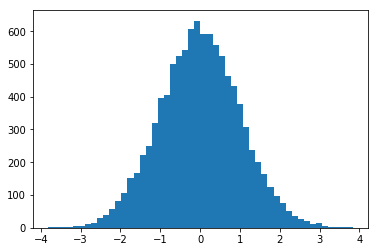

In [425]:
import matplotlib.pyplot as plt

plt.hist(x, bins=50)
plt.show()

* 中位数

In [427]:
np.median(x)

-0.01024418366119727

* 均值

In [428]:
x.mean()

-0.004164442327293362

In [430]:
np.mean(x)

-0.004164442327293362

* 方差

In [431]:
x.var()

1.0221853234535774

In [432]:
np.var(x)

1.0221853234535774

* 标准差

In [433]:
x.std()

1.0110318112965473

In [434]:
np.std(x)

1.0110318112965473